In [18]:
%run Packages/Requirement.ipynb
%run Packages/Functions_basics.ipynb
%run Packages/Functions_forest_and_joined.ipynb
%run Packages/Functions_NN.ipynb
%run Packages/Functions_Final.ipynb

### Load Datasets

In [2]:
data_bkg, data_sim_sign, data_lhcb = load_all_datas(labels=True, check_none=True)
data_compl = get_complementary_cut(data_lhcb)
datas_or = [data_bkg, data_sim_sign, data_lhcb, data_compl]

In [3]:
for data in datas_or:
    clean_datas(data, only_useful=False, only_unbiased=False, inplace=True)
datas_show = copy.deepcopy(datas_or)
for data in datas_or:
    clean_datas(data, only_useful=False, only_unbiased=True, inplace=True)

In [4]:
datas_train, x_test, y_test = take_test_set(datas_or, write_on_file=True)
datas = [datas_train[0], datas_train[1], datas_or[2], datas_or[3]]

In [ ]:
#x_train, y_train, x_test, y_test = train_test_split_mod(data_bkg, data_sim_sign, max_samples=1050)

#### Show Datas

In [ ]:
show_datas(datas_show[:-1], density=True, cuts=True, choose_logs=True)

# Fraction of the total sample to be used

<Figure size 1800x1800 with 0 Axes>

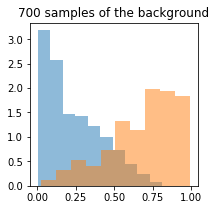

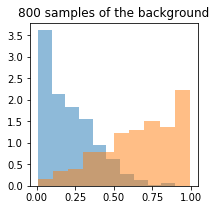

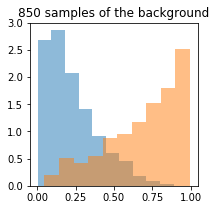

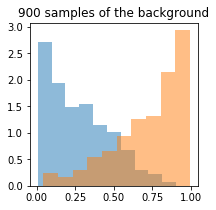

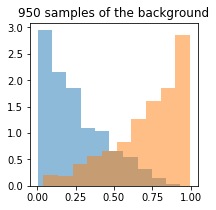

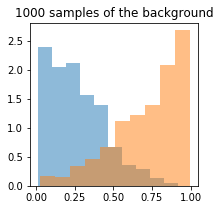

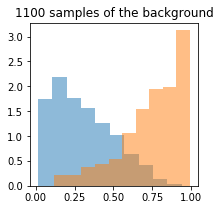

In [9]:
datas_optimized = prepare_data(datas, return_all_datas_optimized=True)

samples = [700, 800, 850, 900, 950, 1000, 1100]
get_plots_fraction_tot_samples(datas_optimized[0], datas_optimized[1], samples=samples)

# Random Forest

## Random Forest Classifier - All features

In [10]:
x_train, y_train = get_training_datas(datas, max_samples=925)

In [ ]:
forest_clf = RandomForestClassifier(n_jobs=-1)

parameters = {'n_estimators': [300],
             'bootstrap': [True],
             'max_features': [2, 3, 4, 5, 6]}

find_best_parameters(forest_clf, parameters, x_train, y_train)

In [ ]:
best_forest_clf = RandomForestClassifier(n_estimators=300, max_features=5, bootstrap=True, n_jobs=-1)
best_forest_clf.fit(x_train,y_train)

In [ ]:
give_result(best_forest_clf, x_test, y_test)

## Random Forest Classifier - Useful uncorrelated Features

#### Preparing datas

In [14]:
x_train_opt, y_train_opt, x_test_opt, y_test_opt = prepare_data(datas, optimized=True)

#### Training forest

In [ ]:
forest_clf = RandomForestClassifier(n_jobs=-1)

parameters = {'n_estimators': [200, 300, 400],
             'bootstrap': [True],
             'max_features': [2, 3, 4, 5, 6]}

find_best_parameters(forest_clf, parameters, x_train_opt, y_train_opt)

In [ ]:
best_forest_clf_opt = RandomForestClassifier(n_estimators=300, max_features=3, bootstrap=True, n_jobs=-1)
best_forest_clf_opt.fit(x_train_opt, y_train_opt)

In [ ]:
give_result(best_forest_clf_opt, x_test_opt, y_test_opt)

## Random Forest Classifier - Useful Features

#### Preparing datas

In [19]:
x_train, y_train = get_training_datas(datas, max_samples=925)
x_train_usf, x_test_usf = optimize(x_train, x_test, useful=True)
y_train_usf = y_train
y_test_usf = y_test

#### Training forest

In [ ]:
forest_clf = RandomForestClassifier(n_jobs=-1)

parameters = {'n_estimators': [200, 300, 400],
             'bootstrap': [True],
             'max_features': [2, 3, 4, 5, 6]}

find_best_parameters(forest_clf, parameters, x_train_usf, y_train_usf)

In [20]:
best_forest_clf_usf = RandomForestClassifier(n_estimators=300, max_features=3, bootstrap=True, n_jobs=-1)
best_forest_clf_usf.fit(x_train_usf, y_train_usf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(894,)
(894,)
Accuracy: 	 0.8568232662192393


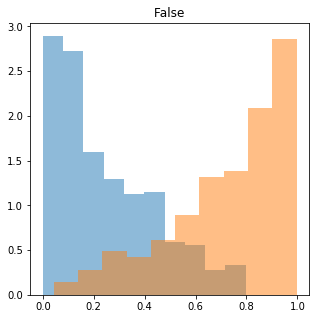

In [21]:
give_result(best_forest_clf_usf, x_test_usf, y_test_usf)

# Ensemble Forests

#### Preparing datas

In [25]:
datas_usf = prepare_data(datas, return_all_datas_useful=True)

data_sig_usf = datas_usf[1].sample(frac=1).reset_index(drop=True)
data_sig_train = data_sig_usf[:700]
data_sig_test = data_sig_usf[700:]

data_bkg_usf = datas_usf[0].sample(frac=1).reset_index(drop=True)
data_bkg_train = data_bkg_usf[:200000]
data_bkg_test = data_bkg_usf[200000:]

x_test_ens, y_test_ens = ensemble_give_test(data_sig_test, data_bkg_test)

#### Training ensemble

In [26]:
ensemble_forest = ensemble_random_forest(n_classifiers=50)

ensemble_forest.fit(data_bkg_train, data_sig_train)

(686,)
(686,)
Accuracy: 	 0.8454810495626822


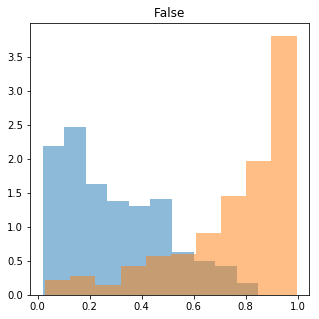

In [27]:
give_result(ensemble_forest, x_test_ens, y_test_ens)

# AdaBoost

#### Preparing datas

In [28]:
x_train, y_train = get_training_datas(datas, max_samples=925)

#### Training AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier()

parameters = {'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=1), 
                                DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4)],
             'n_estimators': [10,100,1000,2500],
             'learning_rate': [0.01,0.1,0.2,0.5]}

find_best_parameters(ada_clf, parameters, x_train, y_train)

In [29]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7),
                            n_estimators=2000, learning_rate=0.9)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.9, n_estimators=2000, random_state=None)

(894,)
(894,)
Accuracy: 	 0.8579418344519015


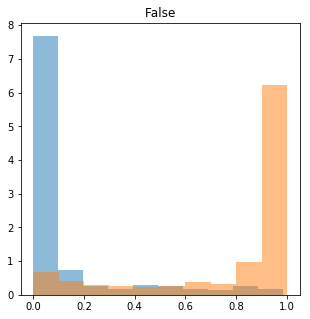

In [30]:
give_result(ada_clf, x_test, y_test)

# Gradient Boosting

#### Preparing datas

In [ ]:
x_train_usf, y_train_usf, x_test_usf, y_test_usf = prepare_data(datas, useful=True)
x_train, y_train, x_test, y_test = train_test_split_mod(data_bkg, data_sim_sign, max_samples=1300)

#### Training AdaBoost

In [ ]:
grad_clf = GradientBoostingClassifier()

parameters = {'max_depth': [3],
              'max_features': [7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'n_estimators': [2000],
             'learning_rate': [1.0]}

find_best_parameters(grad_clf, parameters, x_train, y_train)

In [ ]:
grad_clf = GradientBoostingClassifier(max_depth=3, max_features=16, n_estimators=2000, learning_rate=1.0)
grad_clf.fit(x_train, y_train)

In [ ]:
give_result(grad_clf, x_test, y_test)

# Ensemble all the ones above

#### Preparing datas

In [31]:
x_train, y_train = get_training_datas(datas, max_samples=925)

In [32]:
data_sig_train = datas[1].sample(frac=1).reset_index(drop=True)
data_bkg_train = datas[0].sample(frac=1).reset_index(drop=True)

#### Training ensemble

In [33]:
forest_clf = RandomForestClassifier(n_estimators=300, max_features=5, bootstrap=True, n_jobs=-1)
ensemble_forest = ensemble_random_forest(n_classifiers=50, useful=False)
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7),
                            n_estimators=2000, learning_rate=0.9)
grad_clf = GradientBoostingClassifier(max_depth=3, max_features=18, n_estimators=2000, learning_rate=1.0)

In [34]:
voting_clf = VotingClassifier(estimators=[
                                        ("forest", forest_clf),
                                        ("ada", ada_clf),
                                        ("grd", grad_clf)],
                              voting='soft', n_jobs=-1)
voting_clf.fit(x_train, y_train)
ensemble_forest.fit(data_bkg_train, data_sig_train)
join_clf = JoinClassifiers([voting_clf, ensemble_forest], weights=[2,1])

(894,)
(894,)
Accuracy: 	 0.8668903803131991


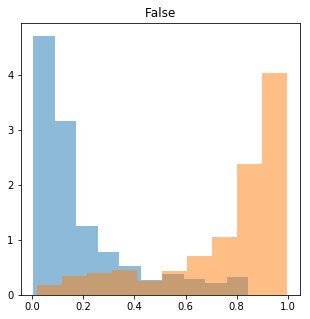

In [35]:
give_result(join_clf, x_test, y_test)

# Neural Network

#### Preparing datas

In [36]:
x_train_usf, y_train_usf, x_test_usf, y_test_usf = prepare_data(datas, useful=True)
x_train, y_train = get_training_datas(datas, max_samples=925)

In [37]:
#x_train_nn, y_train_nn, x_test_nn, y_test_nn = prepare_data_nn(x_train, y_train, x_test, y_test)

In [38]:
data_train_nn = [datas[1], datas[0]]

#### Looking for best configurations

In [ ]:
layers_size = [50]
batch_normalization = False

search_for_batch_size(x_train_nn, y_train_nn, epochs=40,
                    layers_size=layers_size,
                    batch_normalization=batch_normalization,
                    dropout=0.4,
                   verbose=0)

In [ ]:
parameters = {
    "layers_size": [[75,50,30], [50,75,35], [60,40,20]],
    "batch_normalization": [True, False],
    "dropout": [0.1,0.4,0.6]
}

try_nn_parameters(parameters)

#### Training the networks

In [40]:
best_dropout = 0.45
best_batch_size = 3
best_batch_normalization = True
best_layers = [[100], [50,35], [75,50,30]]

dropouts = [best_dropout, 0]
batch_size = best_batch_size
batch_normalizations = [best_batch_normalization, False]
layers_sizes = best_layers

best_models = [build_model(x_train.shape[1],
                           layers_size=layers_size,
                           batch_normalization=best_batch_normalization,
                           dropout=best_dropout)
               for layers_size in best_layers]

all_models, weights = make_all_nn_models(dropouts=dropouts, batch_normalizations=batch_normalizations,
                                         layers_sizes=layers_sizes, input_shape=x_train.shape[1],
                                         best_dropout=best_dropout,
                                         best_batch_normalization=best_batch_normalization,
                                         best_layers_sizes=best_layers)

In [41]:
best_models_trained, best_models_checkpoints_paths, best_models_scalers_paths = fit_nn_models(best_models,
                                          data_train_nn,
                                          batch_size=best_batch_size,
                                          epochs=40,
                                          just_best_models=True
                                         )

Processing 1 / 3 model.

Epoch 00001: val_accuracy improved from -inf to 0.81090, saving model to Models_checkpoints/best_model_1.ckpt

Epoch 00002: val_accuracy improved from 0.81090 to 0.82853, saving model to Models_checkpoints/best_model_1.ckpt

Epoch 00003: val_accuracy improved from 0.82853 to 0.83974, saving model to Models_checkpoints/best_model_1.ckpt

Epoch 00004: val_accuracy improved from 0.83974 to 0.84776, saving model to Models_checkpoints/best_model_1.ckpt

Epoch 00005: val_accuracy did not improve from 0.84776

Epoch 00006: val_accuracy did not improve from 0.84776

Epoch 00007: val_accuracy improved from 0.84776 to 0.84936, saving model to Models_checkpoints/best_model_1.ckpt

Epoch 00008: val_accuracy did not improve from 0.84936

Epoch 00009: val_accuracy did not improve from 0.84936

Epoch 00010: val_accuracy improved from 0.84936 to 0.85256, saving model to Models_checkpoints/best_model_1.ckpt

Epoch 00011: val_accuracy did not improve from 0.85256

Epoch 00012: v


Epoch 00030: val_accuracy did not improve from 0.84615

Epoch 00031: val_accuracy did not improve from 0.84615

Epoch 00032: val_accuracy did not improve from 0.84615

Epoch 00033: val_accuracy did not improve from 0.84615

Epoch 00034: val_accuracy did not improve from 0.84615

Epoch 00035: val_accuracy did not improve from 0.84615

Epoch 00036: val_accuracy did not improve from 0.84615

Epoch 00037: val_accuracy did not improve from 0.84615

Epoch 00038: val_accuracy did not improve from 0.84615

Epoch 00039: val_accuracy did not improve from 0.84615

Epoch 00040: val_accuracy did not improve from 0.84615


In [42]:
all_models_trained, all_models_checkpoints_paths, all_models_scalers_paths = fit_nn_models(all_models,
                                                                 data_train_nn,
                                                                 batch_size=best_batch_size,
                                                                 epochs=45,
                                                                 just_best_models=False
                                                                )

Processing 1 / 12 model.

Epoch 00001: val_accuracy improved from -inf to 0.83173, saving model to Models_checkpoints/model_1.ckpt

Epoch 00002: val_accuracy improved from 0.83173 to 0.83654, saving model to Models_checkpoints/model_1.ckpt

Epoch 00003: val_accuracy improved from 0.83654 to 0.84936, saving model to Models_checkpoints/model_1.ckpt

Epoch 00004: val_accuracy improved from 0.84936 to 0.86538, saving model to Models_checkpoints/model_1.ckpt

Epoch 00005: val_accuracy did not improve from 0.86538

Epoch 00006: val_accuracy improved from 0.86538 to 0.86699, saving model to Models_checkpoints/model_1.ckpt

Epoch 00007: val_accuracy did not improve from 0.86699

Epoch 00008: val_accuracy did not improve from 0.86699

Epoch 00009: val_accuracy did not improve from 0.86699

Epoch 00010: val_accuracy did not improve from 0.86699

Epoch 00011: val_accuracy did not improve from 0.86699

Epoch 00012: val_accuracy did not improve from 0.86699

Epoch 00013: val_accuracy did not improv


Epoch 00030: val_accuracy improved from 0.86859 to 0.87179, saving model to Models_checkpoints/model_3.ckpt

Epoch 00031: val_accuracy did not improve from 0.87179

Epoch 00032: val_accuracy did not improve from 0.87179

Epoch 00033: val_accuracy did not improve from 0.87179

Epoch 00034: val_accuracy did not improve from 0.87179

Epoch 00035: val_accuracy did not improve from 0.87179

Epoch 00036: val_accuracy did not improve from 0.87179

Epoch 00037: val_accuracy did not improve from 0.87179

Epoch 00038: val_accuracy did not improve from 0.87179

Epoch 00039: val_accuracy did not improve from 0.87179

Epoch 00040: val_accuracy did not improve from 0.87179

Epoch 00041: val_accuracy did not improve from 0.87179

Epoch 00042: val_accuracy did not improve from 0.87179

Epoch 00043: val_accuracy did not improve from 0.87179

Epoch 00044: val_accuracy did not improve from 0.87179

Epoch 00045: val_accuracy did not improve from 0.87179
Processing 4 / 12 model.

Epoch 00001: val_accuracy


Epoch 00019: val_accuracy did not improve from 0.87340

Epoch 00020: val_accuracy did not improve from 0.87340

Epoch 00021: val_accuracy did not improve from 0.87340

Epoch 00022: val_accuracy did not improve from 0.87340

Epoch 00023: val_accuracy did not improve from 0.87340

Epoch 00024: val_accuracy did not improve from 0.87340

Epoch 00025: val_accuracy did not improve from 0.87340

Epoch 00026: val_accuracy did not improve from 0.87340

Epoch 00027: val_accuracy did not improve from 0.87340

Epoch 00028: val_accuracy did not improve from 0.87340

Epoch 00029: val_accuracy did not improve from 0.87340

Epoch 00030: val_accuracy did not improve from 0.87340

Epoch 00031: val_accuracy did not improve from 0.87340

Epoch 00032: val_accuracy did not improve from 0.87340

Epoch 00033: val_accuracy did not improve from 0.87340

Epoch 00034: val_accuracy did not improve from 0.87340

Epoch 00035: val_accuracy did not improve from 0.87340

Epoch 00036: val_accuracy did not improve from 


Epoch 00013: val_accuracy improved from 0.82532 to 0.83654, saving model to Models_checkpoints/model_9.ckpt

Epoch 00014: val_accuracy did not improve from 0.83654

Epoch 00015: val_accuracy did not improve from 0.83654

Epoch 00016: val_accuracy did not improve from 0.83654

Epoch 00017: val_accuracy did not improve from 0.83654

Epoch 00018: val_accuracy did not improve from 0.83654

Epoch 00019: val_accuracy did not improve from 0.83654

Epoch 00020: val_accuracy did not improve from 0.83654

Epoch 00021: val_accuracy did not improve from 0.83654

Epoch 00022: val_accuracy did not improve from 0.83654

Epoch 00023: val_accuracy did not improve from 0.83654

Epoch 00024: val_accuracy did not improve from 0.83654

Epoch 00025: val_accuracy did not improve from 0.83654

Epoch 00026: val_accuracy did not improve from 0.83654

Epoch 00027: val_accuracy did not improve from 0.83654

Epoch 00028: val_accuracy did not improve from 0.83654

Epoch 00029: val_accuracy improved from 0.83654 to


Epoch 00004: val_accuracy did not improve from 0.83974

Epoch 00005: val_accuracy improved from 0.83974 to 0.85577, saving model to Models_checkpoints/model_12.ckpt

Epoch 00006: val_accuracy did not improve from 0.85577

Epoch 00007: val_accuracy did not improve from 0.85577

Epoch 00008: val_accuracy did not improve from 0.85577

Epoch 00009: val_accuracy did not improve from 0.85577

Epoch 00010: val_accuracy did not improve from 0.85577

Epoch 00011: val_accuracy did not improve from 0.85577

Epoch 00012: val_accuracy did not improve from 0.85577

Epoch 00013: val_accuracy did not improve from 0.85577

Epoch 00014: val_accuracy did not improve from 0.85577

Epoch 00015: val_accuracy did not improve from 0.85577

Epoch 00016: val_accuracy did not improve from 0.85577

Epoch 00017: val_accuracy did not improve from 0.85577

Epoch 00018: val_accuracy did not improve from 0.85577

Epoch 00019: val_accuracy did not improve from 0.85577

Epoch 00020: val_accuracy did not improve from 0.

In [43]:
write_checkpoints_to_file(best_models_checkpoints_paths, all_models=False)
write_checkpoints_to_file(all_models_checkpoints_paths, all_models=True)

In [44]:
write_scalers_to_file(best_models_scalers_paths, all_models=False)
write_scalers_to_file(all_models_scalers_paths, all_models=True)

#### Predicting - fetching data and models

In [ ]:
x_test_ensemble_nn, y_test_ensemble_nn = fetch_test_data_ensemble_nn()

In [45]:
nn_models, scalers = fetch_models(models=all_models, all_models=True)

#### Predicting - predictions

In [46]:
ensemble_nn = Ensemble_NN(nn_models, scalers)

(894, 1)
(894,)
Accuracy: 	 0.8713646532438478


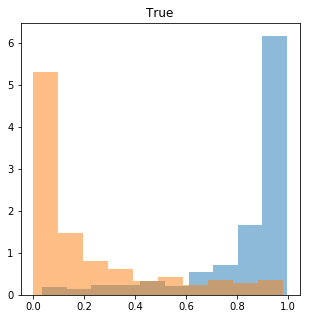

In [47]:
give_result(ensemble_nn, x_test, y_test, nn=True)

# Final - All Best Predictors Together

In [48]:
final_predictor = Final_Ensemble([ensemble_nn, join_clf])

(894, 1)
(894,)
Accuracy: 	 0.8747203579418344


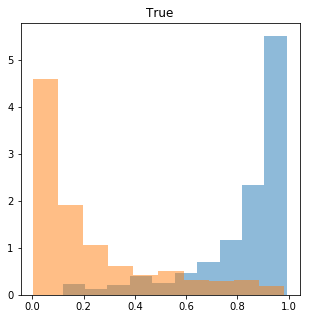

In [49]:
give_result(final_predictor, x_test, y_test, nn=True)